In [4]:
import numpy as np
import pandas as pd # data processing, CSV file

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns 

#one hot encoding
from sklearn.preprocessing import OneHotEncoder

#PCA
from sklearn.decomposition import PCA

#clustering model library
from sklearn.cluster import KMeans



In [5]:
#read data
data = pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')


In [6]:
data.columns
data.size
data.shape # we have 15 features in this data set and 1453 rows

(1453, 15)

In [7]:
data.head(3) #we have 15 features in this dataset

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [8]:
print(pd.isnull(data).sum()) # we do not have any null values in this dataset

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [9]:
data.describe(exclude="object")
# since we have 11 categorial features in this dataset so,only column Age gives most the summary here
# 11 variable(cols) has yes or no values.


,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [10]:
num_features = data.select_dtypes(exclude="object")
cat_features = data.select_dtypes(include="object")
print("Numeric variables",num_features.dtypes," ","categorial variables",cat_features.dtypes)


Numeric variables Age    int64
dtype: object   categorial variables yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
VisitFrequency    object
Gender            object
dtype: object


In [11]:
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    data[x] = LabelEncoder().fit_transform(data[x])
    return data

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
data


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [12]:
num_features = data.select_dtypes(exclude="object")
cat_features = data.select_dtypes(include="object")
print("Numeric variables",num_features.dtypes," ","categorial variables",cat_features.dtypes)

Numeric variables yummy         int32
convenient    int32
spicy         int32
fattening     int32
greasy        int32
fast          int32
cheap         int32
tasty         int32
expensive     int32
healthy       int32
disgusting    int32
Age           int64
dtype: object   categorial variables Like              object
VisitFrequency    object
Gender            object
dtype: object


In [13]:
#Checking for the count of below variables
# data['Gender'].value_counts()
data['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

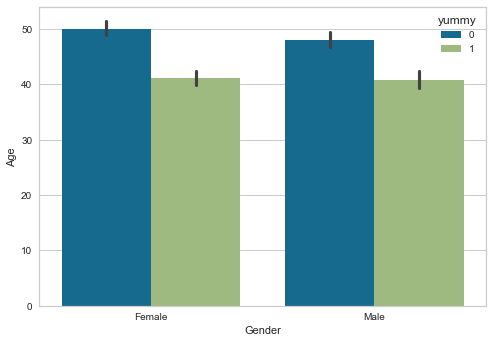

In [14]:
# Segmentation on the basis of gender and their feeling of yummy or not yummy
#so tastewise more men and women dont like it and says its not yummy form the age of 40 to 50 in women and same in men
sns.barplot(y='Age',x='Gender',hue='yummy',data=data);


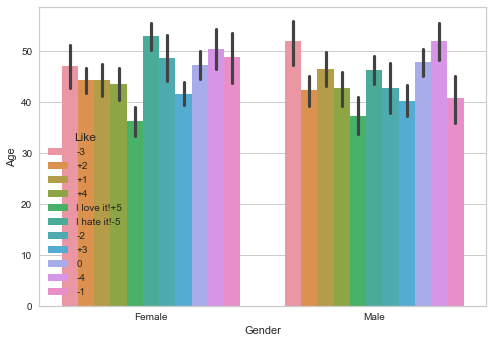

In [15]:
sns.barplot(y='Age',x='Gender',hue ='Like',data=data);

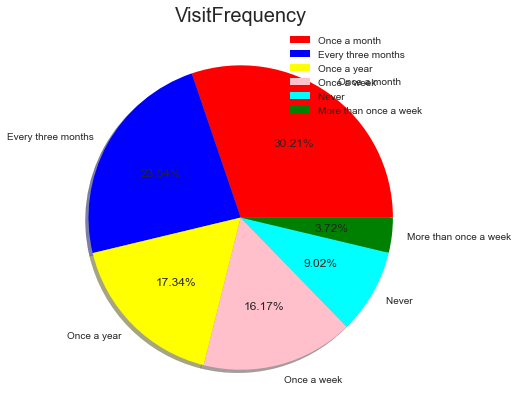

In [16]:
#EXPLORING DATA

#Customer segmentation - based on frequency of visit

labels = ['Once a month', 'Every three months','Once a year','Once a week','Never ','More than once a week']
size = data['VisitFrequency'].value_counts()

colors = ['red','blue','yellow','pink','cyan','green']
explode = None
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('VisitFrequency', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()
#we infer that there are maximum visits in duration of 1 month



In [17]:
data.describe()
# wefind the age bracket of customers lie between 18 to 71 years


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,44.604955
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,14.221178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,45.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,57.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.000000


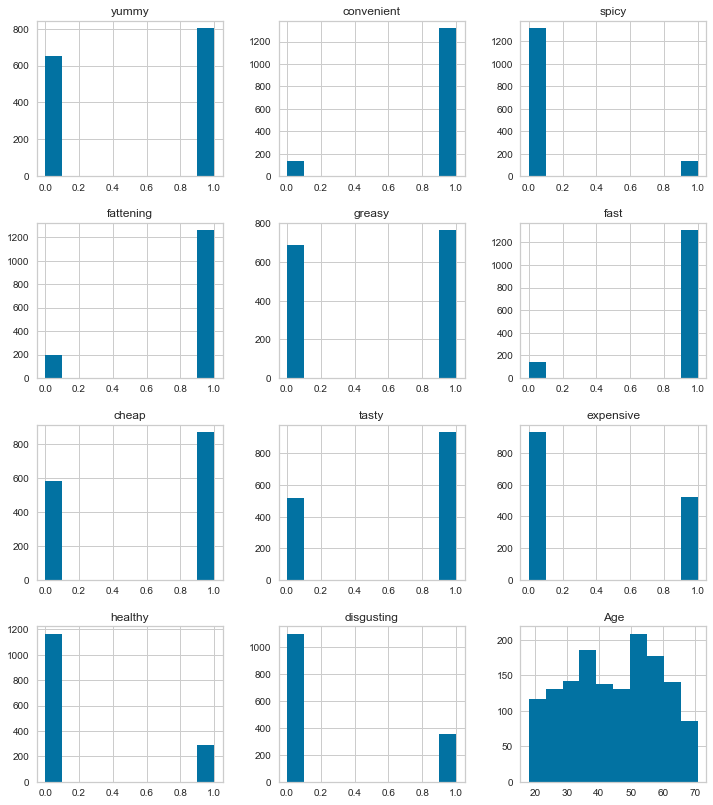

In [18]:
#Histogram of the each attributes
plt.rcParams['figure.figsize'] = (12,14)
data.hist()
plt.show()

In [19]:
# 11 features have only two labels o or 1 so we take this in seperate dataframe


data_11 = data.loc[:,cat]
data_11

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [20]:
#Considering only the 11 cols and converting it into array
cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']
x = data.loc[:,cat].values
x


array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [21]:
#Lets start with PCA now

from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
pc_columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = pc_columns)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [22]:
# we see that first two components contain  50% of the information contained in segment variable
pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [23]:
# component loadings or weights (correlation coefficient between original variables and the component) 

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = data_11.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


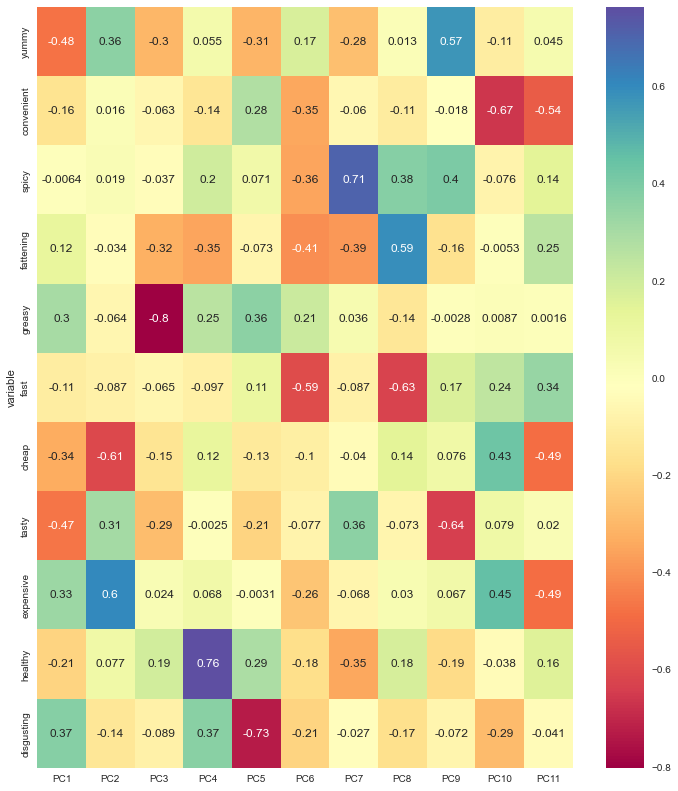

In [24]:
#Correlation matrix plot for loadings 
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [25]:
# PCA creeplot
!pip install bioinfokit
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_])

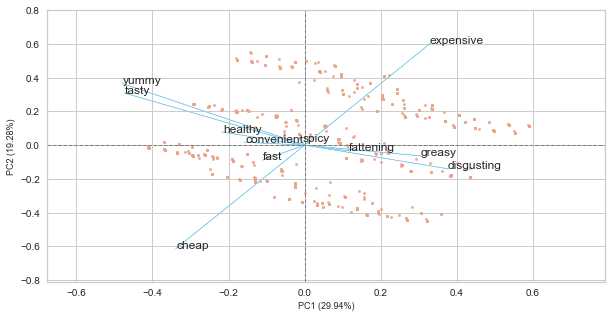

In [26]:
# get PC scores
pca_score = PCA().fit_transform(x)

# get 2D biplot
cluster.biplot(cscore=pca_score, loadings=loadings, labels=data.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

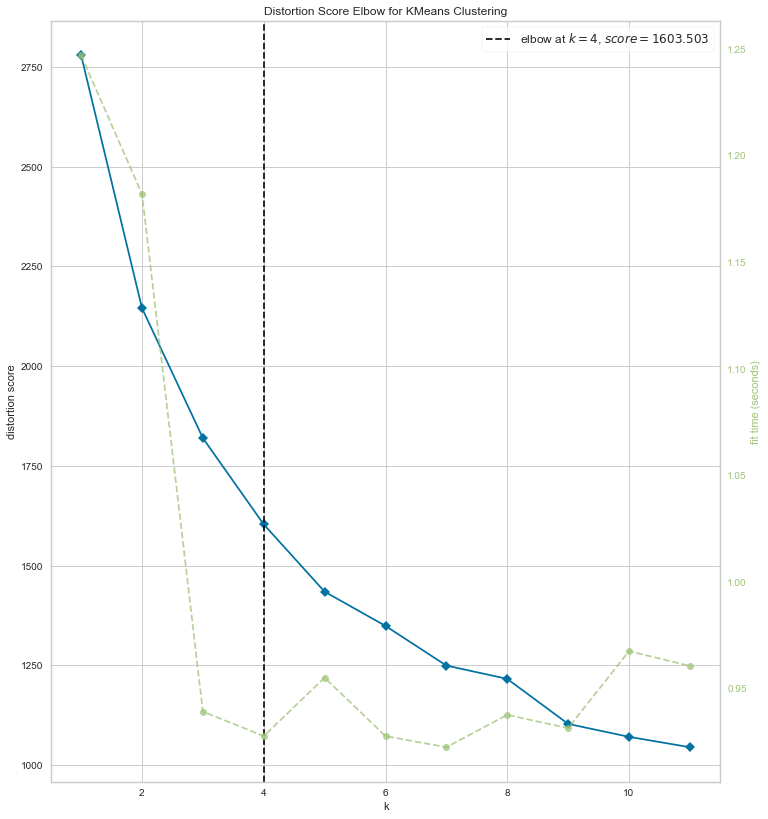

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
#we do not know the number of numbers of the cluster, we have to use methods such as Elbow or Silhouette methods 
#for finding the optimal number of clusters in the dataset. 

!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(data_11)
visualizer.show()

In [31]:
#K-means clustering 

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(data_11)
data['cluster_numbers'] = kmeans.labels_ #adding to dataframe data
print (kmeans.labels_) 
#gives predicted class labels (cluster) for each data point
print (kmeans.inertia_) 
#This is a total of the within-cluster sum of squares for all clusters
print(kmeans.n_iter_) 
#number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) 
#Location of the centroids on each cluster

[2 0 0 ... 0 1 3]
1603.0425348972697
8
[[0.85185185 0.95987654 0.13271605 0.90432099 0.61728395 0.85802469
  0.10802469 0.93209877 0.89814815 0.2037037  0.10493827]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.02040816 0.68571429 0.08571429 0.91836735 0.69795918 0.73469388
  0.06530612 0.08571429 0.87755102 0.06122449 0.71836735]]


In [32]:
# Size of each cluster
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 304, 0: 324, 1: 580, 3: 245})

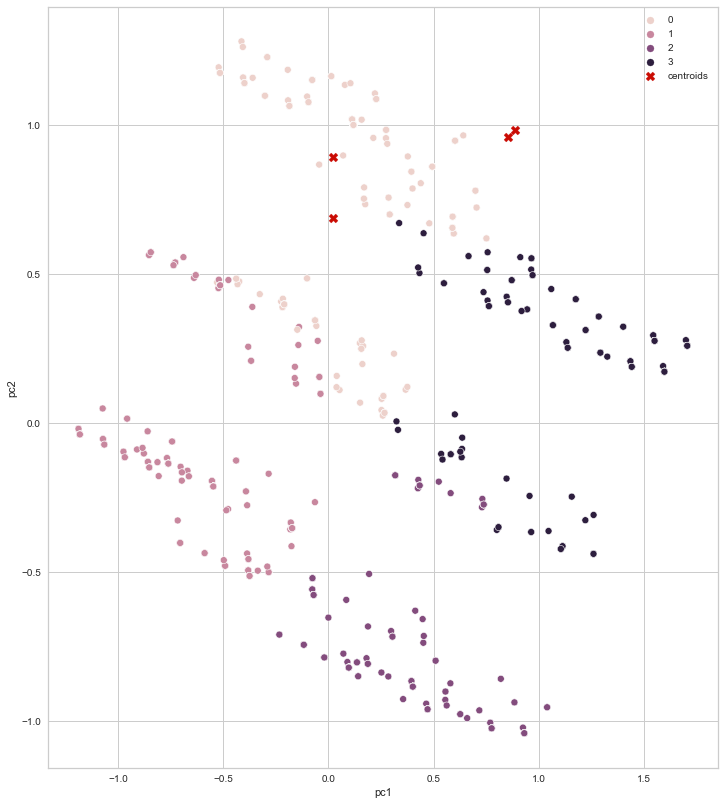

In [33]:
#Visulazing clusters
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [44]:
#DESCRIBING SEGMENTS

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(data['cluster_numbers'],data['Like'])
#Reordering cols
crosstab = crosstab[['I hate it!-5','-4','-3','-2','-1','0','+1','+2','+3','+4','I love it!+5']]
crosstab 

Like,I hate it!-5,-4,-3,-2,-1,0,+1,+2,+3,+4,I love it!+5
cluster_numbers,,,,,,,,,,,
0,5,4,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,27,30,19,13,39,14,6,8,0,0


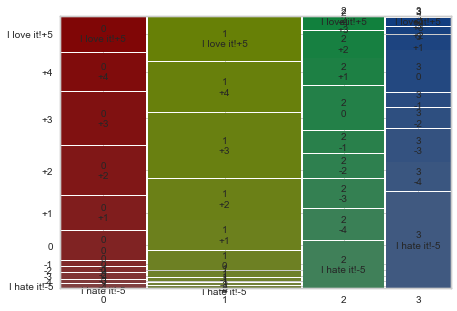

In [45]:

#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

In [42]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(data['cluster_numbers'],data['Gender'])
crosstab_gender

Gender,Female,Male
cluster_numbers,,
0,155,169
1,349,231
2,179,125
3,105,140


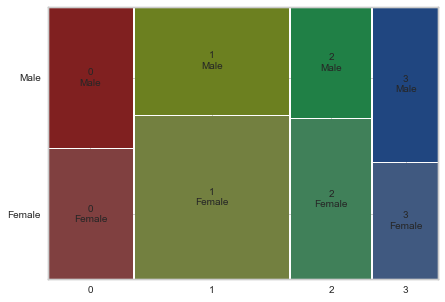

In [46]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

<AxesSubplot:xlabel='cluster_numbers', ylabel='Age'>

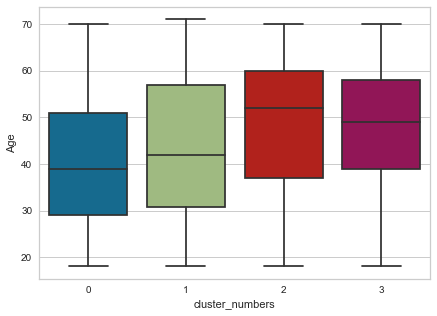

In [48]:
#box plot for age

sns.boxplot(x="cluster_numbers", y="Age", data=data)

In [50]:
#Calculating the mean
#Visit frequency
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('cluster_numbers')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_numbers,VisitFrequency
0,0,2.540123
1,1,2.584483
2,2,2.822368
3,3,2.665306


In [51]:
#Like
data['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = data.groupby('cluster_numbers')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_numbers,Like
0,0,3.808642
1,1,3.794828
2,2,5.430921
3,3,6.738776


In [53]:
#Gender
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gender = data.groupby('cluster_numbers')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_numbers,Gender
0,0,0.521605
1,1,0.398276
2,2,0.411184
3,3,0.571429


In [54]:
segment = Gender.merge(Like, on='cluster_numbers', how='left').merge(visit, on='cluster_numbers', how='left')
segment

,cluster_numbers,Gender,Like,VisitFrequency
0,0,0.521605,3.808642,2.540123
1,1,0.398276,3.794828,2.584483
2,2,0.411184,5.430921,2.822368
3,3,0.571429,6.738776,2.665306


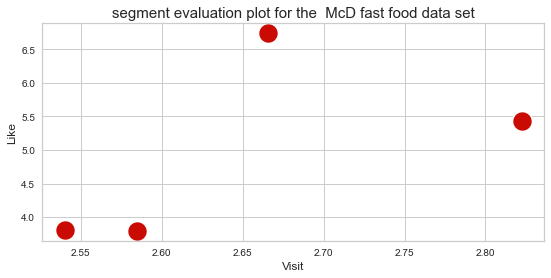

In [56]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("segment evaluation plot for the  McD fast food data set",
          fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()